# Keras Official Tutorial Site
https://keras.io/examples/imdb_lstm/

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM
from keras.datasets import imdb

Using TensorFlow backend.


# Pad-Sequence
- Pads sequences to the same length.
- Transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps).
- Sequences that are shorter than num_timesteps are padded with value at the end.
- Sequences longer than num_timesteps are truncated so that they fit the desired length. 
- https://keras.io/preprocessing/sequence/

In [2]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 1024

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
y_train shape: (25000,)
y_test shape: (25000,)


In [3]:
x_train[0], y_train[0] # sample data

(array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
           71,    43,   530,   476,    26,   400,   317,    46,     7,
            4, 12118,  1029,    13,   104,    88,     4,   381,    15,
          297,    98,    32,  2071,    56,    26,   141,     6,   194,
         7486,    18,     4,   226,    22,    21,   134,   476,    26,
          480,     5,   144,    30,  5535,    18,    51,    36,    28,
          224,    92,    25,   104,     4,   226,    65,    16,    38,
         1334,    88,    12,    16,   283,     5,    16,  4472,   113,
          103,    32,    15,    16,  5345,    19,   178,    32],
       dtype=int32), 1)

# Build Model
- LSTM
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [4]:
print('Build model...')
def LSTM_net(max_features):
    
    model = Sequential([
        Embedding(max_features, 128),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
    #     LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    #     LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    
    return model

model = LSTM_net(max_features)

model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


# Loss & optimizer as default

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
hist =  model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

Train...


/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6383 - accuracy: 0.6574 - val_loss: 0.4876 - val_accuracy: 0.7818
Epoch 2/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.4078 - accuracy: 0.8285 - val_loss: 0.3695 - val_accuracy: 0.8355
Epoch 3/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.2866 - accuracy: 0.8899 - val_loss: 0.3601 - val_accuracy: 0.8416
Epoch 4/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.2259 - accuracy: 0.9178 - val_loss: 0.3867 - val_accuracy: 0.8330
Epoch 5/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.1893 - accuracy: 0.9324 - val_loss: 0.4109 - val_accuracy: 0.8272
Epoch 6/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.1616 - accuracy: 0.9449 - val_loss: 0.5053 - val_accuracy: 0.8202
Epoch 7/15
25000/25000 [==============================] - 35s 1ms/st

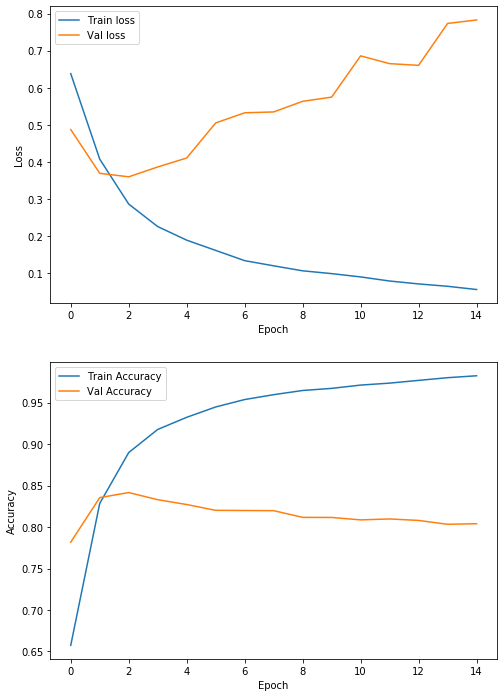

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Previous Unfiltered Data 'MSE' And 'MAE'
def plot_history(history, idx):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'][idx:], hist['loss'][idx:],
           label='Train loss')
    plt.plot(hist['epoch'][idx:], hist['val_loss'][idx:],
           label = 'Val loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'][idx:], hist['accuracy'][idx:],
           label='Train Accuracy')
    plt.plot(hist['epoch'][idx:], hist['val_accuracy'][idx:],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(hist,0)

# Model Evaluation

In [10]:
loss, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test loss:', loss)
print('Test accuracy:', acc)

25000/25000 [==============================] - 8s 339us/step
Test loss: 0.7830690174293518
Test accuracy: 0.8040400147438049


# Save the Model

In [11]:
model.save('./models/imdb_classification.h5')

# Load the model parameter

In [18]:
model2 = LSTM_net(max_features)
model2.load_weights('./models/imdb_classification.h5')

model2.compile(loss='categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
loss, accuracy = model2.evaluate(x_test, y_test, batch_size=batch_size)
print("Loss is", loss, "\nAccuracy is", accuracy)

ValueError: You are passing a target array of shape (25000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.